In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df_raw = pd.read_csv("rawdata/환율.csv", engine = "python", parse_dates=["APPL_DATE"])
df_raw.head(5)

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


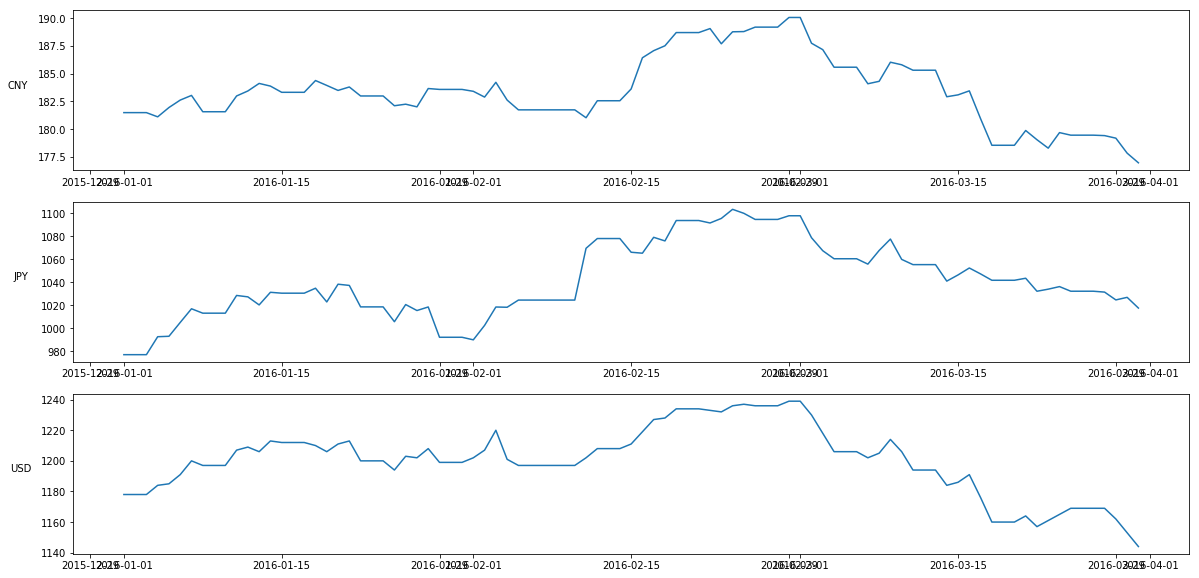

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows =3, ncols=1, figsize =(20,10))

for (ax, idx, currency) in zip ([ax1, ax2, ax3],[331,312,313],["CNY", "JPY", "USD"]):
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [4]:
df_CNY = df_raw[df_raw["CURRENCY"] == "CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_JPY = df_raw[df_raw["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_USD = df_raw[df_raw["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [5]:
train_size = 0.9
len_idx = len(df_USD.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [6]:
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]

In [7]:
print("Shape of train data\t:{}".format(df_USD_train.shape))
print("Shape of test data\t:{}".format(df_USD_test.shape))

Shape of train data	:(82, 1)
Shape of test data	:(9, 1)


In [8]:
# 직접 설정하는 방법
# df_USD_train = df_USD[df_USD.index <= "2016-03-22"]
# df_USD_test  = df_USD[df_USD.index >  "2016-03-22"]

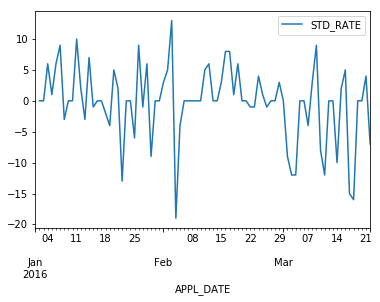

In [9]:
df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

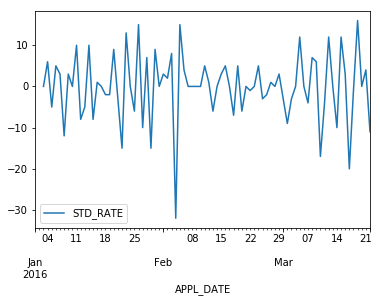

In [10]:
df_USD_diff2 = df_USD_train - 2 * (df_USD_train.shift(1)) + (df_USD_train.shift(2))
df_USD_diff2.plot()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


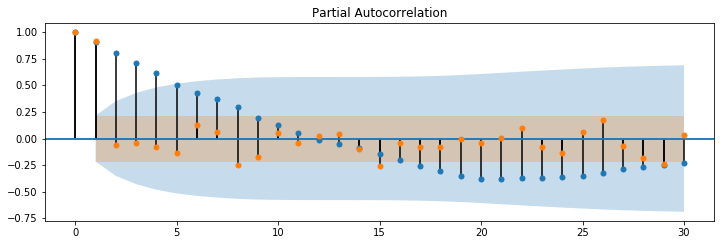

In [11]:
lag_size = 30
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_USD_train["STD_RATE"], lags = lag_size, ax=ax1)
ax2 = fig.add_subplot(211)
fig = plot_pacf(df_USD_train["STD_RATE"], lags = lag_size, ax=ax2)

In [12]:
ts_model_USD = ARIMA(df_USD_train, order = (1,2,0))
ts_result_USD = ts_model_USD.fit(trend = "c", full_output = True)
print(ts_result_USD.summary())

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.800
Method:                       css-mle   S.D. of innovations              7.502
Date:                Fri, 19 Jul 2019   AIC                            555.601
Time:                        16:09:10   BIC                            562.747
Sample:                    01-03-2016   HQIC                           558.466
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0502      0.612     -0.082      0.935      -1.249       1.148
ar.L1.D2.STD_RATE    -0.3763      0.104     -3.622      0.001      -0.580      -0.173
                        

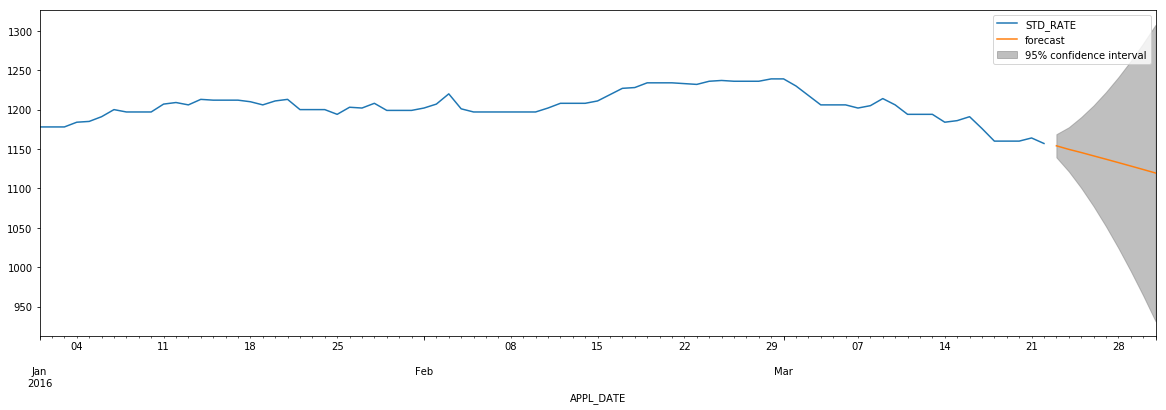

In [15]:
result = pd.DataFrame()

start_time = df_USD_test.index.min()
end_time = df_USD_test.index.max()
fig, ax = plt.subplots(figsize = (20, 6))
ax = df_USD_train.plot(ax = ax)
fig = ts_result_USD.plot_predict(start = start_time, end = end_time, ax = ax, plot_insample = False)

In [16]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_USD.predict(start=start_time, end=end_time, typ='levels')
df_merge = df_USD
df_merge["Predictive value"] = y_pred
df_merge.head()

,STD_RATE,Predictive value
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1177.949753
2016-01-04,1184.0,1177.930843
2016-01-05,1185.0,1187.672879


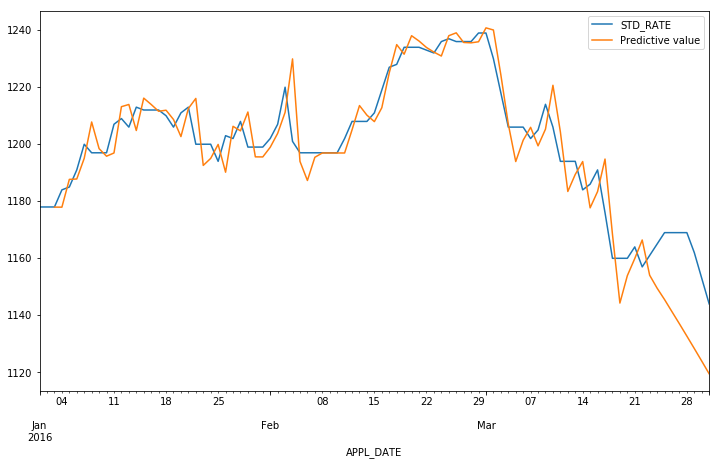

In [17]:
df_merge.plot(y=["STD_RATE", "Predictive value"], figsize=(12,7))